## _Medical Insurance Costs_

Pada kasus ini, terdapat data tentang informasi kesehatan dan biaya yang harus dikeluarkan oleh asuransi kesehatan. Infomasi terkait dengan data _medical insurance cost_ adalah sebagai berikut,

1. Age: Usia penerima manfaat
2. Sex: Gender penerima manfaat (_male_, _femele_)
3. Bmi : Body Mass Index
4. Children: Jumlah anak/tanggungan yang dicover oleh pihak asuransi
5. Smoker: Status perokok (_yes_, _no_)
6. Region: Wilayah tempat tinggal penerima manfaat
7. Charges: Biaya yang dikeluarkan oleh asuransi

In [1]:
# Selayang pandang data Medical Insurance Costs
import pandas as pd

df = pd.read_csv('data/insurance.csv')

display(df.head())

display(df.corr())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\Kresna\AppData\Local\Temp\ipykernel_15896\1982607319.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Tantangan

Buatlah model regresi untuk memprediksi biaya yang harus dikeluarkan oleh pihak asuransi berdasarkan data. Validasi performa model regresi Anda dengan nilai ***R-squared ($R^2$)***

#### _Tasks_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)
2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.
5. Evaluasi model yang Anda buat dengan nilai $R^2$
6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

#### (Hints) Interpretasi Nilai VIF

- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

#### (Hints) Implementasi Perhitungan VIF

VIF dapat dihitung secara langsung dengan menggunakan library dari `statsmodels`

#### (Hints) Scatterplot Korelasi Antar Variabel

![var_cor](assets/var_corr.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

EDA

In [3]:
df.shape, df.head()

((1338, 7),
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

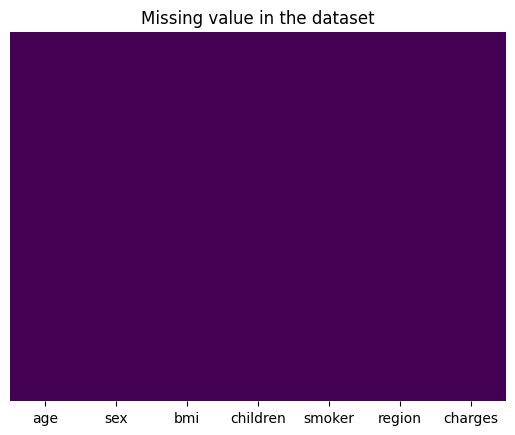

In [6]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');


In [7]:
df['sex'].unique().sum(), df['smoker'].unique().sum(), df['region'].unique().sum()

('femalemale', 'yesno', 'southwestsoutheastnorthwestnortheast')

C:\Users\Kresna\AppData\Local\Temp\ipykernel_15896\1408977041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], color = 'c', kde = True)


Text(0.5, 1.0, 'Distribusi data CHARGES')

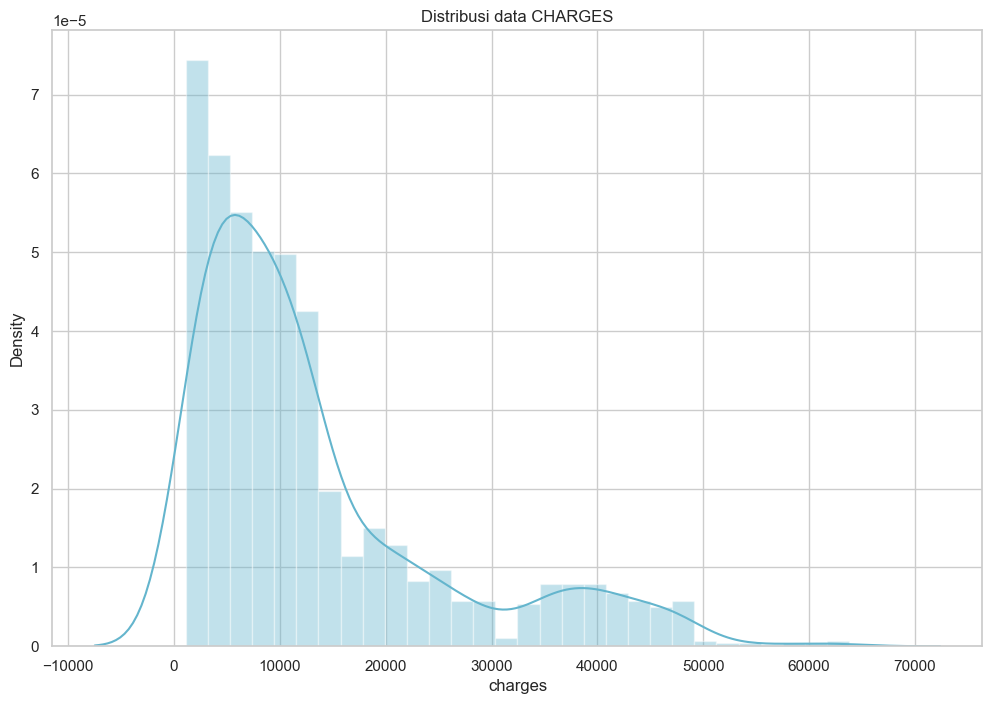

In [8]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.distplot(df['charges'], color = 'c', kde = True)
plt.title('Distribusi data CHARGES')

Distribusi ini miring ke kanan. Untuk membuatnya mendekati normal kita bisa menerapkan natural log

C:\Users\Kresna\AppData\Local\Temp\ipykernel_15896\3050198714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


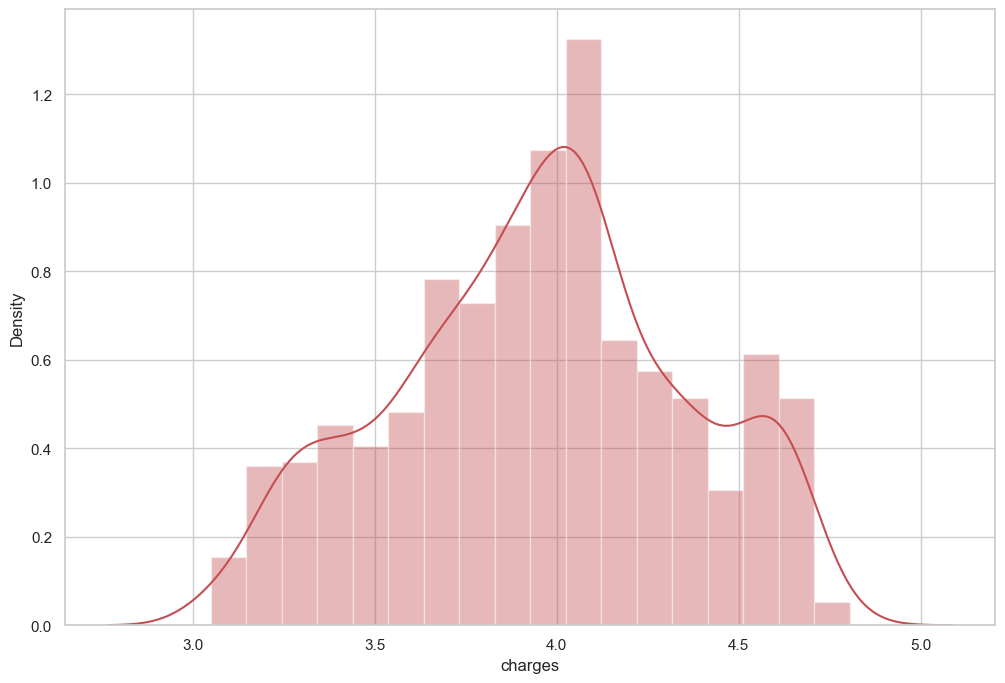

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

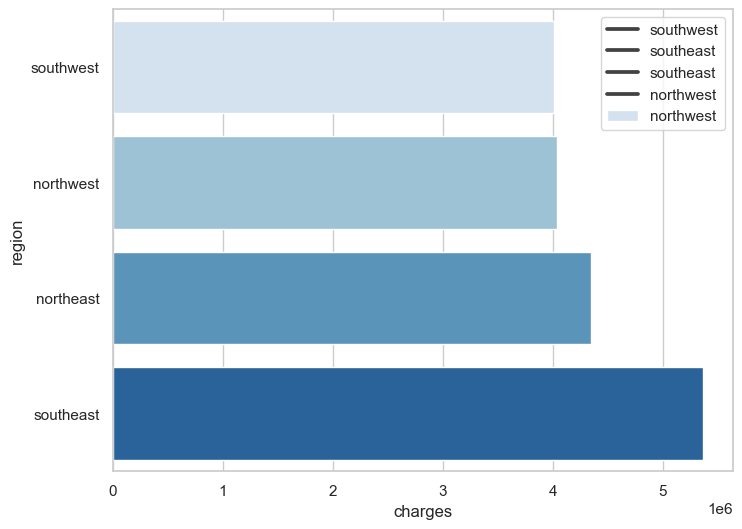

In [10]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x= charges.head(), y = charges.head().index, palette='Blues')
plt.legend(df.region)


southeast memiliki pengeluaran biaya yang paling tinggi

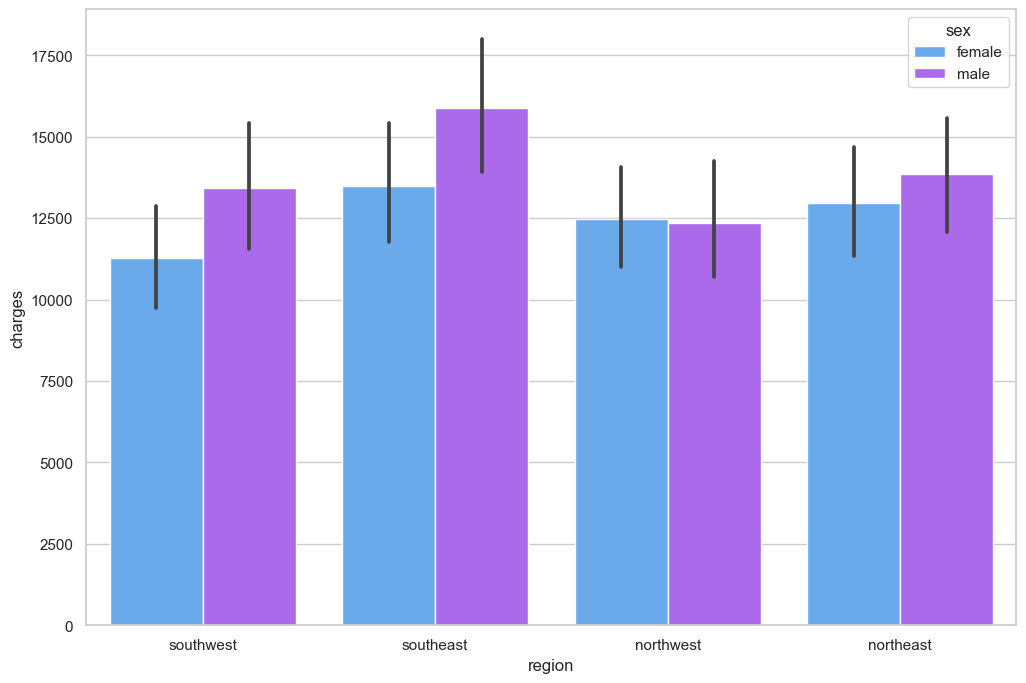

In [11]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

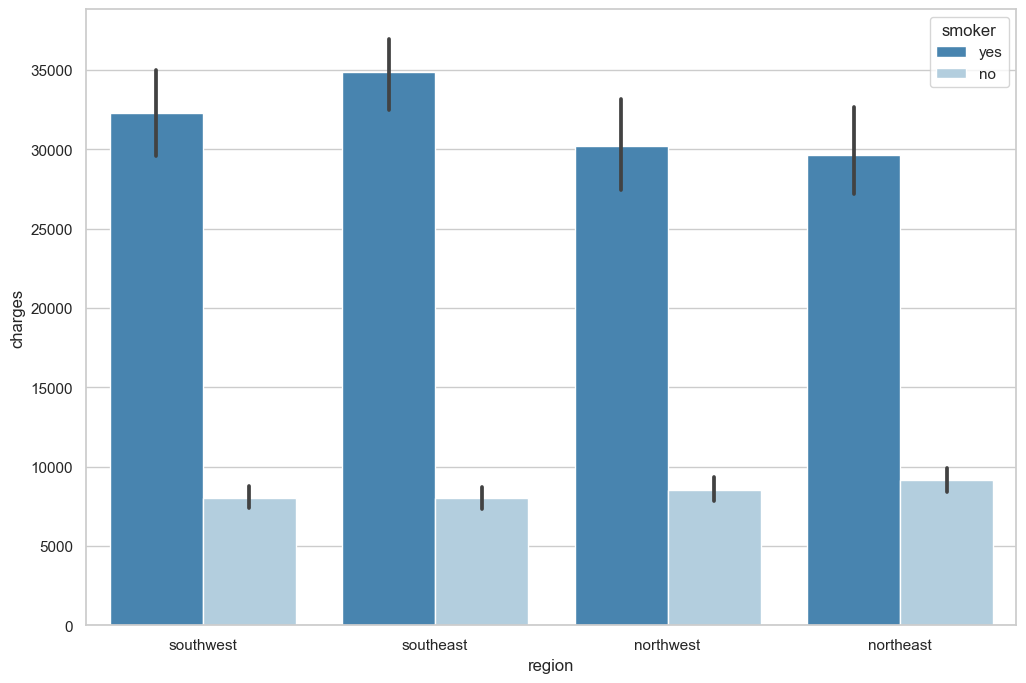

In [12]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette='Blues_r')

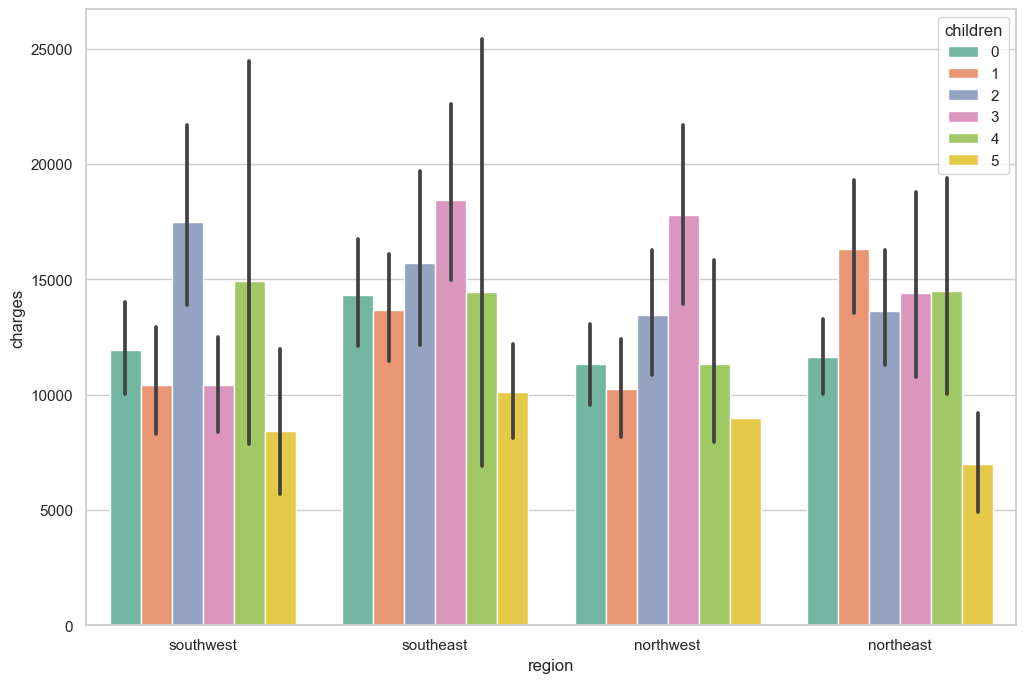

In [13]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df, palette='Set2')

Seperti yang dapat kita lihat dari barplot ini, pungutan tertinggi akibat merokok masih di Tenggara tetapi terendah di Timur Laut. Orang di Southwest umumnya merokok lebih banyak daripada orang di Northeast, tetapi orang di Northeast memiliki biaya lebih tinggi berdasarkan jenis kelamin daripada di Southwest dan Northwest secara keseluruhan. Dan orang-orang dengan anak-anak cenderung memiliki biaya medis yang lebih tinggi secara keseluruhan juga

Sekarang mari kita analisis biaya medis berdasarkan usia, BMI dan anak menurut faktor merokok

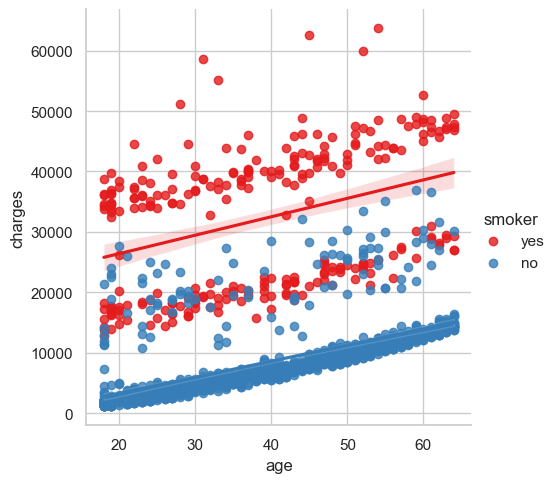

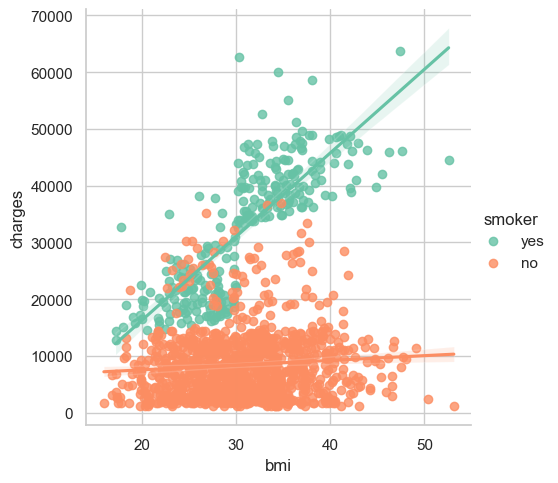

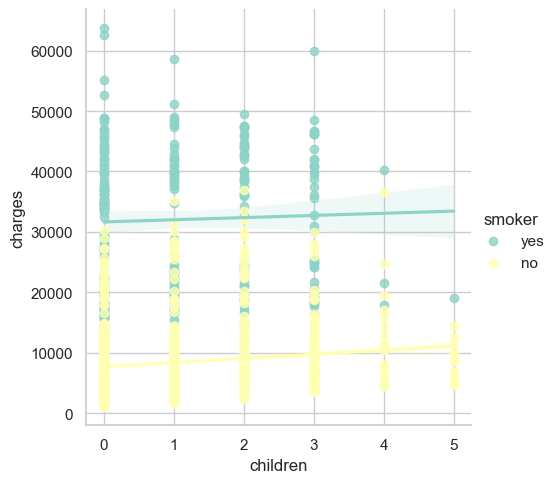

In [14]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set3')

Merokok memiliki dampak paling tinggi terhadap biaya pengobatan, meskipun biaya tersebut bertambah seiring bertambahnya usia, BMI dan anak-anak. Juga orang-orang yang memiliki anak umumnya merokok lebih sedikit, yang juga ditunjukkan oleh plot biola berikut

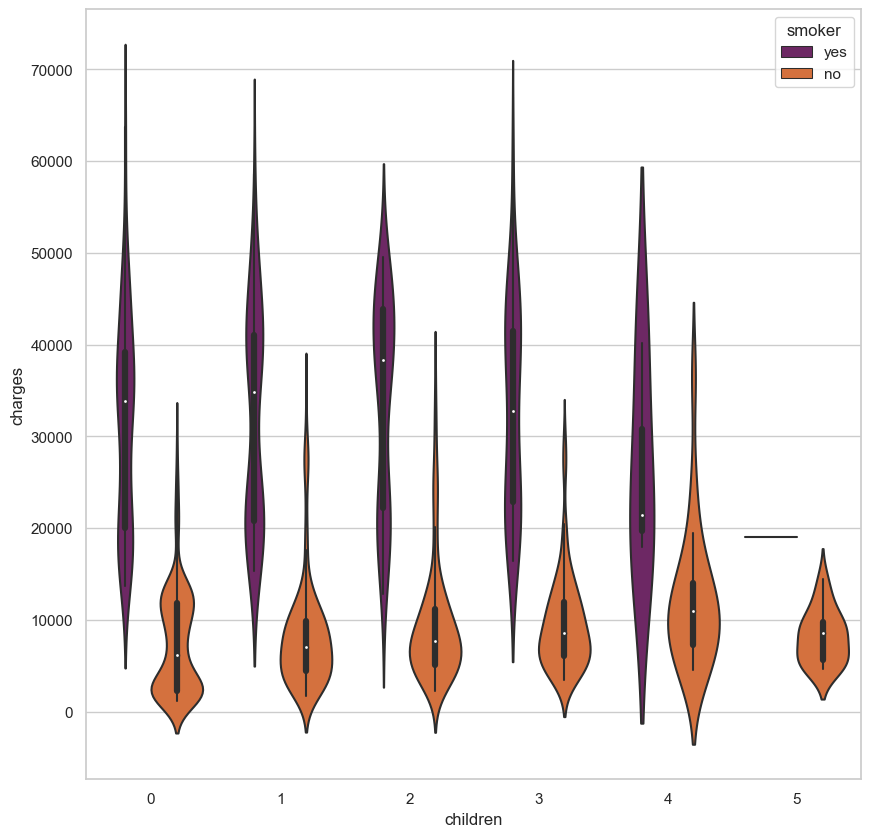

In [15]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df, orient='v', hue='smoker', palette='inferno')

In [16]:
encode = LabelEncoder()
df['sex'] = encode.fit_transform(df['sex'])
df['smoker'] = encode.fit_transform(df['smoker'])
df['region'] = encode.fit_transform(df['region'])
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [17]:
df['sex'].unique(), df['smoker'].unique(), df['region'].unique()

(array([0, 1]), array([1, 0]), array([3, 2, 1, 0]))

In [18]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]

print(vif_data)

    feature        VIF
0       age   9.247094
1       sex   2.007028
2       bmi  10.465005
3  children   1.805834
4    smoker   4.008939
5    region   2.951032
6   charges   7.922113


bmi dan age memiliki nilai multicollinearity yang tinggi, ini membuat kita tidak dapat menggunakan kedua fitur tersebut untuk model kita.

c:\Users\Kresna\miniconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x800 with 0 Axes>

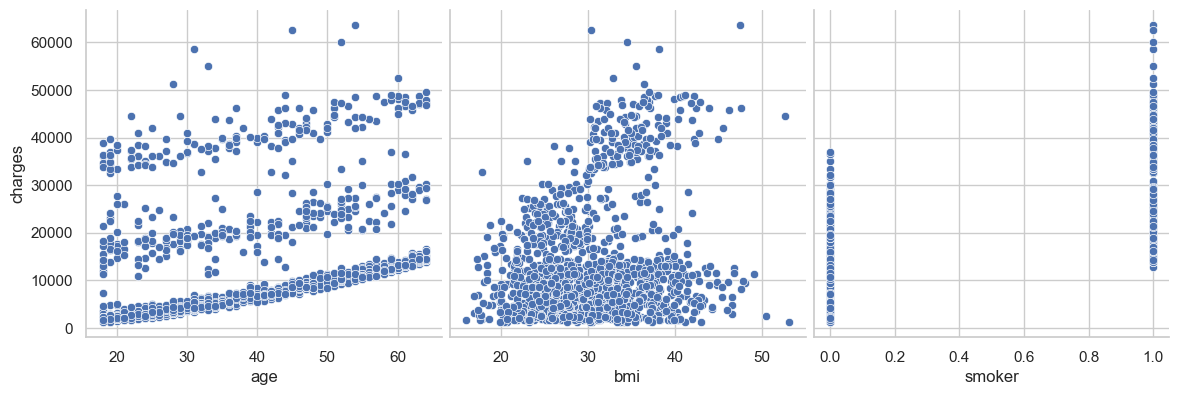

In [19]:
plt.figure(figsize = (8,8))
sns.pairplot(df, x_vars=['age', 'bmi','smoker'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

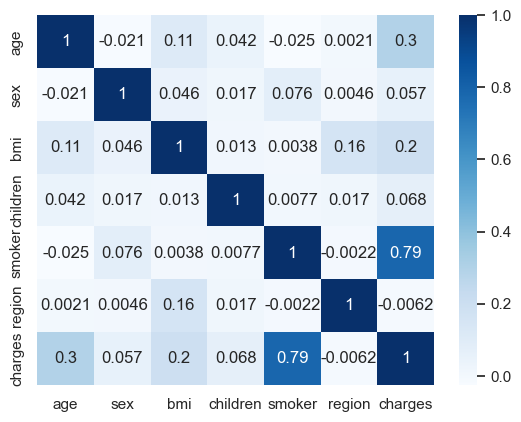

In [20]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

dari heatmap diatas, smoker dan charges memiliki korelasi yang cukup tinggi. Kita dapat membuat regresi dari kedua variabel tersebut

MODELING

In [21]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 100)

In [23]:
# hasil training dtaset
X_train.shape, y_train.shape

((1070, 6), (1070,))

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.intercept_)
print(lr.coef_)
print(f"AKURASI DARI MODEL ADALAH = {lr.score(X_test, y_test)}")

-11307.293746170397
[ 2.64023906e+02  1.34329927e+01  3.08710555e+02  4.74615667e+02
  2.34783078e+04 -3.85005527e+02]
AKURASI DARI MODEL ADALAH = 0.7942462599118463


In [25]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [26]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      -11307.293746
age           264.023906
sex            13.432993
bmi           308.710555
children      474.615667
smoker      23478.307766
region       -385.005527
dtype: float64

In [27]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     499.1
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          4.89e-305
Time:                        22:11:21   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.131e+04   1075.943    -10.509      0.000   -1.34e+04   -9196.081
age          264.0239     13.451     19.628      0.000     237.630     290.418
sex           13.4330    377.714      0.036      0.972    -727.717     754.583
bmi          308.7106     31.187      9.899      0.000     247.516     369.905
children     474.6157    158.461      2.995      0.003     163.683     785.548
smoker      2.348e+04    474.160     49.516      0.000    2.25e+04    2.44e+04
region      -385.0055    173.855     -2.215      0.027    -726.144     -43.867
==============================================================================
Omnibus:                      256.547   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.504
Skew:                           1.289   Prob(JB):                    8.93e-132
Kurtosis:                       5.624   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Coefficient: Coefficient adalah nilai koefisien regresi yang menunjukkan seberapa besar pengaruh variabel independen terhadap variabel dependen. Nilai koefisien regresi yang positif menunjukkan bahwa semakin besar nilai variabel independen, semakin besar juga nilai variabel dependen, sementara nilai koefisien regresi yang negatif menunjukkan bahwa semakin besar nilai variabel independen, semakin kecil nilai variabel dependen.
* Standard Error: Standard Error adalah ukuran kesalahan standar dari koefisien regresi. Semakin rendah nilai Standard Error, semakin akurat estimasi koefisien regresi.
* t-value: t-value adalah nilai statistik yang digunakan untuk mengevaluasi signifikansi dari koefisien regresi. Semakin besar nilai t-value, semakin signifikan koefisien regresi dan semakin kecil probabilitas bahwa koefisien regresi sama dengan nol.
* Confidence Interval: Confidence Interval adalah rentang nilai yang mengandung nilai sebenarnya dari koefisien regresi dengan tingkat kepercayaan tertentu. Rentang nilai ini menunjukkan seberapa besar kemungkinan bahwa nilai sebenarnya dari koefisien regresi berada dalam rentang tersebut.
* P>|t|: p-value untuk uji hipotesis bahwa koefisien regresi tidak signifikan secara statistik. P>|t| menunjukkan probabilitas bahwa koefisien regresi sama dengan nol. Nilai P>|t| yang lebih kecil dari tingkat signifikansi yang ditentukan (biasanya 0.05) menunjukkan bahwa koefisien regresi signifikan secara statistik.
* Omnibus: Omnibus adalah sebuah ukuran statistik yang digunakan untuk mengevaluasi normalitas distribusi residual. Nilai Omnibus yang tinggi menunjukkan bahwa distribusi residual tidak normal.
* Prob(Omnibus): p-value yang terkait dengan ukuran statistik Omnibus. Jika nilai Prob(Omnibus) kurang dari atau sama dengan tingkat signifikansi yang ditentukan (biasanya 0.05), maka dapat dianggap bahwa distribusi residual tidak normal secara signifikan.

In [28]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\Kresna\AppData\Local\Temp\ipykernel_15896\576177224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


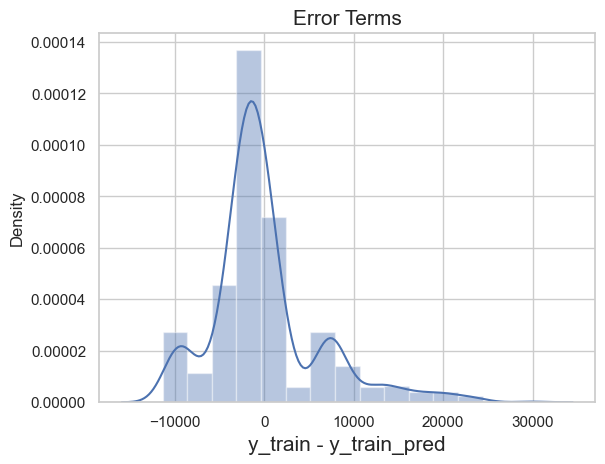

In [29]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [30]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

12      4243.315613
306     4369.130655
318     8459.055910
815     2915.207396
157    24708.665557
dtype: float64

In [31]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7942462599118463

C:\Users\Kresna\AppData\Local\Temp\ipykernel_15896\3350405613.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_test_pred),ax=ax,color='b')


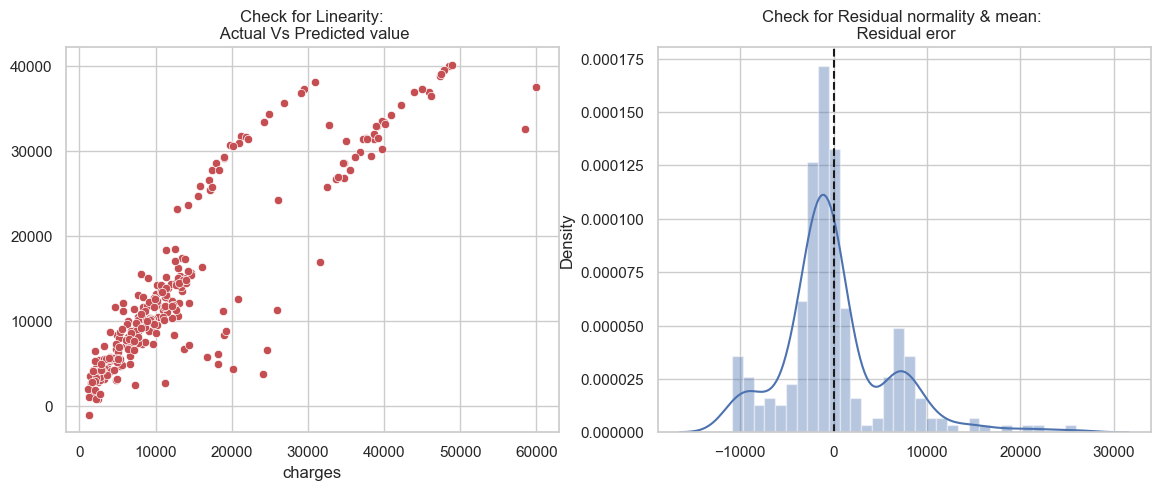

In [32]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x= y_test,y= y_test_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_test_pred),ax=ax,color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

UJI MODEL

In [33]:
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df.T

,12,306,318,815,157,244,642,968,142,1034,...,500,176,636,953,861,713,1282,531,537,1015
Actual,1826.843000,20177.671130,7421.19455,1877.929400,15518.180250,29523.165600,13143.864850,3279.868550,18972.495000,12950.071200,...,36197.699000,6455.862650,2709.111900,38998.546000,7151.092000,1984.453300,14283.459400,14043.476700,8825.086000,12124.992400
Predicted,4243.315613,4369.130655,8459.05591,2915.207396,24708.665557,37368.150928,15281.516021,3147.625861,29150.857158,16274.903123,...,29305.766817,7896.231803,1365.266325,32918.772416,7638.340664,6480.133546,23610.114962,14857.574372,9955.079471,11758.314936


In [35]:
from sklearn.ensemble import RandomForestRegressor



rfg = RandomForestRegressor(n_estimators=100)
rfg.fit(X_train, y_train)

y_pred = rfg.predict(X_test)

print(f"AKURASI DARI MODEL ADALAH = {rfg.score(X_test, y_test)}")

AKURASI DARI MODEL ADALAH = 0.8616536990642583


In [44]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=10)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(f"AKURASI DARI MODEL ADALAH = {xgb.score(X_test, y_test)}")

AKURASI DARI MODEL ADALAH = 0.8889672528992533


C:\Users\Kresna\AppData\Local\Temp\ipykernel_15896\2059118926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred),ax=ax,color='b')


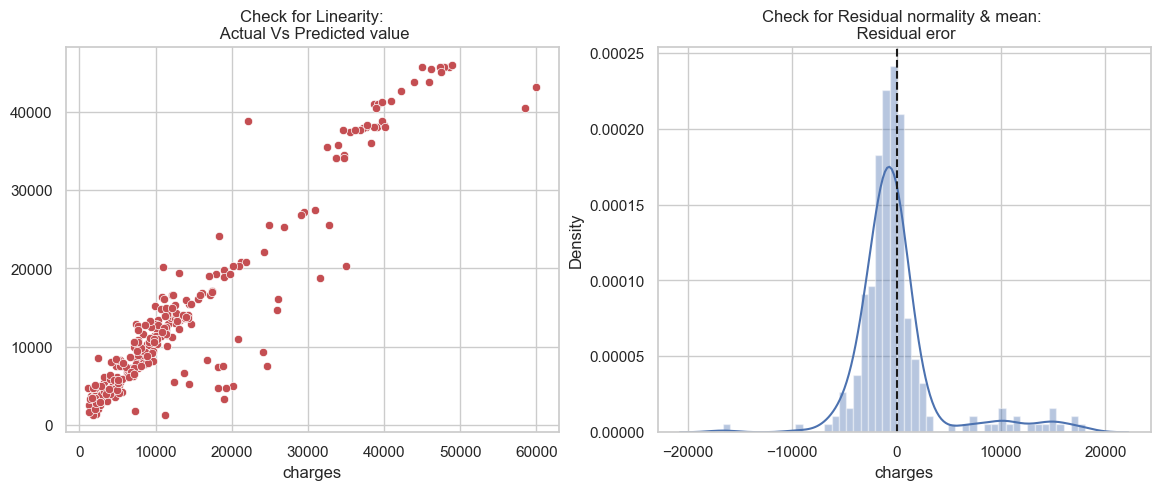

In [45]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x= y_test,y= y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');